![data-x](http://oi64.tinypic.com/o858n4.jpg)


# Homework 4: "Real time" stock stream, plotting & linear regression

**Author: ** Alexander Fred Ojala

___

# Part 1 "Real time" data stream of stock prices

In part 1 you are going to design your own "real time" (batch) stock price prediction and visualization application.



# Q1:

First we have a pre-written program for you (that you are welcome to modify - but it works as is). It fetches "real time" stock data from Google. The program is given to you as it covers some topics that we have not touched upon in class - like user defined input, defensive programming, opening a connection to a url, parsing json data to a dictionary, and writing to a CSV file.

Your task is to run the program below and collect 100 data samples of stock prices for three user defined stocks. There should be an approximate time delay of ten seconds between the updates.

**Note:** The data collection has to be done on a weekday between 9.30am - 4pm (Eastern time), in order for the stock prices to be volatile  - as this is the open trade window for NASDAQ. If you want to start Q2-Q5 before you have collected data, you can access a preliminary CSV file here: https://www.dropbox.com/s/bbf5v325byt3qr6/stock_data_example.csv?dl=1

In [3]:
## Load packages
import urllib2
import datetime as dt
import time
import json
import os.path
import sys

# NASDAQ STOCKS BASE URL
base_url = 'http://finance.google.com/finance/info?client=ig&q=NASDAQ:' 
# Stock examples: AAPL, TSLA, GOOGL


# Define number of stocks, total updates, and time between updates
def assign(string):
    ## Example of defensive programming, input must be positive integer
    
    while True:
        try:
            var = int(raw_input(string+': ')) # convert string input to integer
        except:
            print string + ' must be positive integer, try again'
            continue
        if var < 1:
            print string + ' must be a positive integer, try again'
            continue
        break
        
    return var


nbr_of_stocks = assign("Number of stocks")
nbr_of_updates = assign("Number of total stock updates")
update_time = assign("Approximate time delay (seconds) between updates")


# Define stock names (as stock ticker / stock symbol), store in dictionary
stocks = dict()
for i in range(nbr_of_stocks):
    stock_key = 'stock'+str(i)
    
    # User input, define stock with a certain stock symbol e.g. GOOGL, TSLA, AAPL
    stocks[stock_key] = raw_input("Stock"+str(i+1)+" Code: ") 


def get_stock_value(stock):
    '''
    Fetch stock value for stock ticker / stock symbol
    '''
    
    url = base_url + stock # url to stock
    
    # Defensive programming. Raise error if stock symbol does not exist
    try:
        url_socket = urllib2.urlopen(url)
    except:
        print 'WRONG STOCK CODE "' + stock + '"'
        sys.exit()
    
    data = url_socket.read() # read in the URL data as a string
    
    start_idx = data.find('{') # starting index of json part of the string
    end_idx = data.find('}') # ending index of json part of the string
    
    info = json.loads(data[start_idx:end_idx+1]) #load json data to a dictionary
    stock_price = info['l'] # stock prices are stored under key 'l'
    
    return stock_price


# Create / Overwrite CSV file and add header
f = open('stock_data.csv','wb')
header = 'Time Stamp,'+','.join(stocks.values())

f.write(header+'\n') # write header to CSV file stock_data.csv, add new line


def current_time_str():
    '''
    Get current time as a string: Format "Year-Month-Date Hour:Minute:Second"
    '''
    t = dt.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    return t


print '\n\n\nSTOCK PRICES (USD):\n' # Print output, to see that script is running


i=0
while nbr_of_updates > i:
    '''
    Fetch stock info with given time interval and write to CSV
    Store the values in a list
    '''
    
    # store stock values in a list
    vals = list()
    for stock in stocks.values():
        val = get_stock_value(stock)
        vals.append(val)
        
        print stock, ':', val

        
    t = current_time_str() # current date and time as string
    print 'Fetched at', t,'\n'
    
    
    # write time and stock values as a CSV on a seperate line
    f.write(t+','+','.join(vals)+'\n') 
    i+=1 # iterate
    time.sleep(update_time) # time (in seconds) before the loop runs again


f.close() # close file connection

print '\nDone!'

Number of stocks: 3
Number of total stock updates: 100
Approximate time delay (seconds) between updates: 10
Stock1 Code: GOOGL
Stock2 Code: TSLA
Stock3 Code: AAPL



STOCK PRICES (USD):

GOOGL : 839.77
TSLA : 280.92
AAPL : 134.98
Fetched at 2017-02-15 09:49:43 

GOOGL : 839.77
TSLA : 280.93
AAPL : 134.97
Fetched at 2017-02-15 09:49:55 

GOOGL : 840.00
TSLA : 280.93
AAPL : 134.97
Fetched at 2017-02-15 09:50:06 

GOOGL : 840.02
TSLA : 280.98
AAPL : 134.97
Fetched at 2017-02-15 09:50:19 

GOOGL : 840.02
TSLA : 281.02
AAPL : 134.98
Fetched at 2017-02-15 09:50:30 

GOOGL : 840.02
TSLA : 280.98
AAPL : 134.98
Fetched at 2017-02-15 09:50:41 

GOOGL : 840.02
TSLA : 280.95
AAPL : 134.96
Fetched at 2017-02-15 09:50:53 

GOOGL : 840.05
TSLA : 280.91
AAPL : 134.97
Fetched at 2017-02-15 09:51:04 

GOOGL : 839.96
TSLA : 280.98
AAPL : 134.98
Fetched at 2017-02-15 09:51:15 

GOOGL : 839.96
TSLA : 280.98
AAPL : 134.99
Fetched at 2017-02-15 09:51:29 

GOOGL : 839.96
TSLA : 280.94
AAPL : 134.98
Fetched at

SystemExit: 

#### Part 1 (continued)
# Q2: Simple stock statistics

* 1: Read in the data stored in stock_data.csv to a DataFrame called **df**.


* 2: Convert the 'Time Stamp' column to datetime objects, specifying the year, month, date, hour, minute, second in the format:

    `%Y-%m-%d %H:%M:%S`
    
    Store the datetime objects as the index of **df** (hint: Lookup pandas DatetimeIndex) . Then, drop the 'Time Stamp' column.


* 3: Calculate the OLHC for each stock (Open, Low, High, Close values). Note: Let Open time be the first time stamp in your data set and Closing time the last time stamp in your data set.


* 4: Calculate the mean stock price for each stock, and it's standard deviation.


* 5: Calculate the total change in price over the time period (Closing Value - Open Value)


* 6: Create a variable called **t**, that is an array with every time stamp in seconds after the first stock data was collected. I.e.,

    `t[0] = 0,.., t[99] = 10*100 + running time`. 

In [114]:
## Input answers here ##
import pandas as pd
import numpy as np
from datetime import timedelta

#Part 1
df = pd.read_csv('https://www.dropbox.com/s/bbf5v325byt3qr6/stock_data_example.csv?dl=1')

#Part 2
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'], format = '%Y-%m-%d %H:%M:%S')
df = df.set_index(pd.DatetimeIndex(df['Time Stamp']))
del df['Time Stamp']

#Part 3
Apple_OHLC = pd.Series([df.AAPL.iloc[0], df.AAPL.max(), df.AAPL.min(), df.AAPL.iloc[-1]], index = ['Open', 'High', 'Low', 'Close'])
Tesla_OHLC = pd.Series([df.TSLA.iloc[0], df.TSLA.max(), df.TSLA.min(), df.TSLA.iloc[-1]], index = ['Open', 'High', 'Low', 'Close'])
Google_OHLC = pd.Series([df.GOOGL.iloc[0], df.GOOGL.max(), df.GOOGL.min(), df.GOOGL.iloc[-1]], index = ['Open', 'High', 'Low', 'Close'])

#Part 4
[Apple_Mean, Apple_SD] = [df.AAPL.mean(), df.AAPL.std()]
print "Apple mean and STD:\n", Apple_Mean, Apple_SD
[Tesla_Mean, Tesla_SD] = [df.TSLA.mean(), df.TSLA.std()]
print "Tesla mean and STD:\n", Tesla_Mean, Tesla_SD
[Google_Mean, Google_SD] = [df.GOOGL.mean(), df.GOOGL.std()]
print "Google mean and STD:\n", Google_Mean, Google_SD
print " "

#Part 5
DelApple = df.AAPL.iloc[-1] - df.AAPL.iloc[0]
print "Apple change in price:\n", DelApple
DelTesla = df.TSLA.iloc[-1] - df.TSLA.iloc[0]
print "Tesla change in price:\n", DelTesla
DelGoogle = df.GOOGL.iloc[-1] - df.GOOGL.iloc[0]
print "Google change in price:\n", DelGoogle

#Part 6
index = df.index
change = index - index[0]
t = change.total_seconds()

Apple mean and STD:
132.2843 0.0432108992985
Tesla mean and STD:
269.7107 0.138893571638
Google mean and STD:
836.2268 0.434322600393
 
Apple change in price:
-0.02
Tesla change in price:
0.15
Google change in price:
0.82


# Q3: Plotting

* Create a graph over the stock prices with matplotlib. It should have three subplots, each showing one stock's price change over the time period. The y-axis should show the stock price and the x axis should be the **t** variable from Q1.5, i.e. the number of seconds after the first stock price was fetched (t[0] = 0).  

Try to make a similar plot as the one below (**Note:** Your solution does not have to look exatly the same)

<img style="width: 500px" src="https://www.dropbox.com/s/8036uyug8lq17fk/hw4_plot1.png?dl=1">

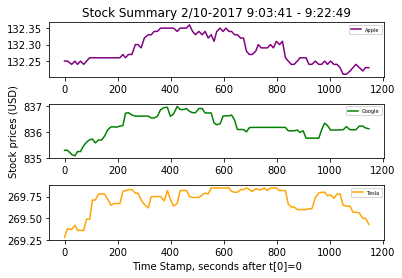

In [75]:
## Input answer here ##
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1)
fig.subplots_adjust(hspace = 0.5)

ax[0].plot(t, df.AAPL, color = 'purple')
ax[0].legend(loc = 1, labels = ['Apple'], fontsize = 5)
ax[0].set_title('Stock Summary 2/10-2017 9:03:41 - 9:22:49')

ax[1].plot(t, df.GOOGL, color = 'green')
ax[1].legend(loc = 1, labels = ['Google'], fontsize = 5)
ax[1].set_ylabel('Stock prices (USD)')

ax[2].plot(t, df.TSLA, color = 'orange')
ax[2].legend(loc = 1, labels = ['Tesla'], fontsize = 5)

plt.xlabel('Time Stamp, seconds after t[0]=0')

plt.show()



# Q4: Prediction

* 1: Fit three Linear Regression models, each model should use all the data collected for one stock, i.e., fit one model for each of the stocks. 


* 2: Use the models from Q4.1 to predict what the stock price would be for each stock ten minutes after the Closing time.


* 3: Calculate the Mean Squared Error (MSE) for your stock price prediction models, i.e. calculate 3 MSEs, one for every stock prediction model.


* 4: Form three new Regression models, using only the 30 first data samples collected, i.e. dependent variables **stock_price[:30]** and predictors **t[:30]**. Use these models to predict the stock price for the three stocks at the time stamp **t[59]**, then compare your predictions to the collected stock value at that time (i.e., **stock_price[59]**).



In [115]:
## Input answer here ##
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#Part 1
T = t.reshape(1, -1)
T = T.T
reg_TSLA = linear_model.LinearRegression(n_jobs=1)
reg_TSLA.fit(T, df.TSLA)
reg_GOOGL = linear_model.LinearRegression(n_jobs=1)
reg_GOOGL.fit(T, df.GOOGL)
reg_AAPL = linear_model.LinearRegression(n_jobs=1)
reg_AAPL.fit(T, df.AAPL)

#Part 2
future_time = T+600
TSLA_future = reg_TSLA.predict(future_time).flatten()
GOOGL_future = reg_GOOGL.predict(future_time).flatten()
AAPL_future = reg_AAPL.predict(future_time).flatten()

#Part 3
TSLAA = reg_TSLA.predict(T).flatten()
GOOGLL = reg_GOOGL.predict(T).flatten()
AAPLL = reg_AAPL.predict(T).flatten()
TSLA_MSE = mean_squared_error(df.TSLA, TSLAA)
GOOGL_MSE = mean_squared_error(df.GOOGL, GOOGLL)
AAPL_MSE = mean_squared_error(df.AAPL, AAPLL)

print "Tesla mean squared error:\n", TSLA_MSE
print "Google mean squared error:\n", GOOGL_MSE
print "Apple mean squared error:\n", AAPL_MSE

#Part 4
f30 = T[:30]

reg_TSLA.fit(f30, df.TSLA[:30])
reg_GOOGL.fit(f30, df.GOOGL[:30])
reg_AAPL.fit(f30, df.AAPL[:30])

Tfut = reg_TSLA.predict(t[59]).flatten()
Gfut = reg_GOOGL.predict(t[59]).flatten()
Afut = reg_AAPL.predict(t[59]).flatten()

print " "
print "Actual vs Predicted values, respectively:"
print "Tesla:\n", df.TSLA[59], Tfut
print "Google:\n", df.GOOGL[59], Gfut
print "Apple:\n", df.AAPL[59], Afut


Tesla mean squared error:
0.0184405600062
Google mean squared error:
0.185697098125
Apple mean squared error:
0.00170620705087
 
Actual vs Predicted values, respectively:
Tesla:
269.85 [ 270.30940396]
Google:
836.01 [ 838.65376466]
Apple:
132.28 [ 132.39234375]


# Q5: Plot stock prices together with your 30 data point predictions

* Plot the three stock prices as in Q3, and then plot the Linear Regression predictions that predicted stock prices from your 30 first collected samples. Plot the stock prices and the Linear Predictions in the same figure for the same time period, i.e. **t**. Also add a vertical line to your three plots where **t = t[29]** (i.e. at and before this line are all the data points used to form your 30 data point regression models). 

    Try to make a similar plot as the one below (**Note:** Your solution does not have to look exatly the same)
    
<img style="width: 500px" src="https://www.dropbox.com/s/utj4xozvtdt7xjo/hw4_plot2.png?dl=1">

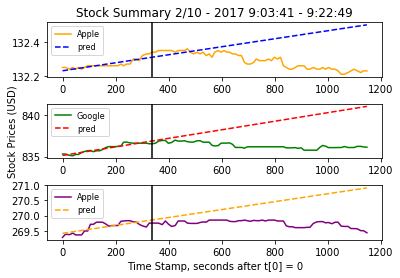

In [106]:
## Input answer here ##

fig, ax = plt.subplots(nrows = 3, ncols = 1)
fig.subplots_adjust(hspace = 0.5)

tt = reg_TSLA.predict(T).flatten()
tg = reg_GOOGL.predict(T).flatten()
ta = reg_AAPL.predict(T).flatten()

ax[0].plot(T, df.AAPL, color = 'orange')
ax[0].plot(T, ta, color = 'blue', linestyle = '--')
ax[0].legend(loc = 2, labels = ['Apple', 'pred'], fontsize = 8)
ax[0].axvline(T[29], color = 'black')


ax[1].plot(T, df.GOOGL, color = 'green')
ax[1].plot(T, tg, color = 'red', linestyle = '--')
ax[1].legend(loc = 2, labels = ['Google', 'pred'], fontsize = 8)
ax[1].axvline(t[29], color = 'black')


ax[2].plot(T, df.TSLA, color = 'purple')
ax[2].plot(T, tt, color = 'orange', linestyle = '--')
ax[2].legend(loc = 2, labels = ['Apple', 'pred'], fontsize = 8)
ax[2].axvline(t[29], color = 'black')

ax[0].set_title('Stock Summary 2/10 - 2017 9:03:41 - 9:22:49')
ax[1].set_ylabel('Stock Prices (USD)')
plt.xlabel('Time Stamp, seconds after t[0] = 0')

plt.show()

# Extra credit

Mathematically derive the optimal weights that minimizes the least square error, **$\epsilon^2$**. I.e. prove that $\hat{\beta} = (X^TX)^{-1}X^TY $ (matrix notation) are the optimal weight estimates for the ordinary least squares (OLS) model, given that $(X^TX)^{-1}$ exists.

$$Y = \hat{\beta} X + \epsilon \text{    see matrix notation below:}$$

.

$$\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{M}
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{11} & \cdots & x_{1N} \\
1 & x_{21} & \cdots & x_{2N} \\
\vdots & \ddots & \ddots & \vdots \\
1 & x_{M1} & \cdots & x_{MN}
\end{bmatrix}
*
\begin{bmatrix}
\hat{\beta}_{0} \\
\hat{\beta}_{1} \\
\vdots \\
\hat{\beta}_{N}
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_{1} \\
\epsilon_{2} \\
\vdots \\
\epsilon_{M}
\end{bmatrix} $$

.

<center>The objective is to minimize: $\epsilon^T\epsilon$:</center>


$$\epsilon^T\epsilon = \begin{bmatrix}
\epsilon_{1} & \epsilon_{2} & \cdots & \epsilon_{M} \\
\end{bmatrix}
\begin{bmatrix}
\epsilon_{1} \\
\epsilon_{2} \\
\vdots \\
\epsilon_{M}
\end{bmatrix} = \sum_{i=1}^{M}\epsilon_{i}^{2}
$$


<center> where, </center>

$$\epsilon = Y-\hat{\beta} X$$



In [ ]:
'''
## PLEASE SUBMIT YOUR ANSWER to the EXTRA CREDIT question as 
## a written mathematical proof.
## Either turn it in as a PDF to bcourses (scanned / photo copy) 
## named "[student name]-hw4-ec.pdf"
## or turn it in on paper 
## at the beginning of Lecture 5 with your name and SID
'''